# Investissements : immobilier locatif

Ce projet a pour objectif d'étudier le marché de l'immobilier à Abdidjan et plus particulièrement le marché locatif. Nous nous intéressons tout particulièrement aux prix des locations et nous les comparons aux prix des achats afin de déterminer les meilleurs investissements locatifs en fonction des caractéristiques des biens.

* **Problématique :** Identifier les meilleurs investissements locatifs ;
* **Modélisation :** Utiliser un prédicteur de prix pour les biens locatifs et un autre pour les achats. Pour un nouveau bien ayant des caractéristiques déterminées, trouver des moyens de mesurer la performance des investissements.

### Moyens

* Scraper le maximum d'annonces immobilières sur Abidjan (90\% des annonces du site) ;
* Récupérer les données suivantes : la date du scraping, la surface, le nombre de pièces, le prix, le lien internet de l'annonce, l'adresse, la ville, la région, le descriptif de l'annonce, la mention du caractère neuf ou ancien et la nature du bien ;
* Nettoyer la base de données, si possible et si cohérent, extraire des données supplémentaires ;
* Tester des modèles de predictions, sélectionner le meilleur modèle ;
* Construire les mesures de performance des investissements à partir des modèles prédictifs des prix.

## Phase de scraping

**Site** : `deals.jumia.ci` 

In [1]:
from selenium import webdriver
from selenium.webdriver import Chrome
from requests import get
import itertools
import pandas as pd
import base64
import time
import re
import scraping_ci as sci

`deals.jumia.ci` est un site du type `leboncoin.fr`. Ce site répertorie un panel important d'annonces immobilières. Ces annonces sont regroupées en catégories : *locations d'appartements (55 000+ annonces)*, *locations de maisons (50 000+ annonces)*, *achats d'appartements (7 000 annonces)* et *achats de maisons (45 000+ annonces)*.

### Processus

1. Parcourir les pages dans chacune des catégories afin de récupérer les liens des annonces (20 000+ liens par session) ;

2. Parcourir la liste des liens (la structure du site oblige à rentrer dans le détail des annonces pour récupérer les données requises), récupérer les données et les stocker dans un premier fichier `csv` qui servira à stocker les données du dernier scraping en cours ; 

3. Ouvrir un autre fichier `csv` qui servira à la compilation des données des différentes sessions de scraping et transférer les données du fichier `csv` de l'étape 2 à celui-ci ;

4. Une fois satisfait par les données récupérées sur les quatre catégories, tout concaténer dans une seule base de données `csv` qui sera prête à être nettoyée.

### Initialisation des variables pour le test

Si vous voulez tester le code que j'ai utilisé, je vous ai tout initialisé pour que vous puissiez regarder un peu la structure du site et la façon dont j'ai réalisé l'extraction.

In [2]:
# URL pour les catégories à scraper du projet ML
url_jumia_vente_maison='https://deals.jumia.ci/abidjan/maisons-a-vendre?xhr=wcbow&page='
url_jumia_vente_appart='https://deals.jumia.ci/abidjan/appartements-a-vendre?page='
url_jumia_location_maison='https://deals.jumia.ci/abidjan/maisons-a-louer?page='
url_jumia_location_appart='https://deals.jumia.ci/abidjan/appartements-a-louer?page='

In [3]:
# initialisation des variables utilisées pour faire tourner les pages afin de selectionner les liens
# des offres
start_page=0
pages_jumia=1

In [97]:
driver = webdriver.Chrome()
driver.get('https://deals.jumia.ci/abidjan/immobilier')

### Récupération et stockage des liens


In [6]:
liste_liens=sci.get_links_jumia(start_page,url_jumia_location_appart,pages_jumia)# recupere les liens

In [14]:
sci.enregistrer_liste_liens('exemple_presentation',liste_liens)# les enregistre dans un fichier .txt

'Fichier exemple_presentation enregistré.'

### Scraping et stockage des données

In [12]:
test_presentation=sci.get_annonces_jumia_location_appartements(liste_liens)# recupere les annonces
test_presentation

,Links,Title,Nature_annonce,Prix,Currency,Adresse,Ville,Pays,Nb_pieces_Surface_m2,Type_de_bien,Description
0,https://deals.jumia.ci/appartement-haut-standi...,Appartement Haut-Standing 4 PiÈCes 4 Douches B...,Location,270000.00,FCFA,Vendeur\nsouley\nLieu\nRiviera\nPubliée\nAujou...,Abidjan,Côte d'Ivoire,Nombre de pièces\n4\nSuperficie\n500 m2,Appartement,Très magnifique appartement HAUT-STANDIG 4 piè...
1,https://deals.jumia.ci/appartement-de-5-pi-ces...,Appartement De 5 PiÈCes Au 6È ÉTage En Location,Location,800000.00,FCFA,Vendeur\nSahe\nLieu\nMarcory\nPubliée\nAujourd...,Abidjan,Côte d'Ivoire,Nombre de pièces\n4\nSuperficie\n250 m2,Appartement,À LOUER marcory-zone 4 Appartement de 5 pièces...
2,https://deals.jumia.ci/location-appartement-de...,Location Appartement De 4 PiÈCes À La Riviera ...,Location,650000.00,FCFA,Vendeur\nbadou\nLieu\nAbidjan\nPubliée\njanv. ...,Abidjan,Côte d'Ivoire,Nombre de pièces\n4,Appartement,Location à abidjan cocody riviera golf un appa...
3,https://deals.jumia.ci/location-appartement-de...,Location Appartement De 3 PiÈCes Avec Piscine ...,Location,400000.00,FCFA,Vendeur\nbadou\nLieu\n2 Plateaux\nPubliée\njan...,Abidjan,Côte d'Ivoire,Nombre de pièces\n3,Appartement,En location Appartement de 3 pièces Avec pisci...
4,https://deals.jumia.ci/appartement-louer-pid82...,Appartement À Louer,Location,450000.00,FCFA,Vendeur\nAMENANT NATACHA\nLieu\nCocody\nPublié...,Abidjan,Côte d'Ivoire,Nombre de pièces\n4,Appartement,Découvrez notre bel appartement pas des moindr...
5,https://deals.jumia.ci/appartement-louer-pid82...,Appartement À Louer,Location,275000.00,FCFA,Vendeur\nSahe\nLieu\nKoumassi\nPubliée\nAujour...,Abidjan,Côte d'Ivoire,Nombre de pièces\n4\nSuperficie\n220 m2,Appartement,APPARTEMENT DE 3 PIÈCES 275 000 CFA À LOUER Ab...
6,https://deals.jumia.ci/tres-tres-magnifique-ap...,TRES TRES MAGNIFIQUE Appartement De 3 Pieces T...,Location,300000.00,FCFA,Vendeur\nsouley\nLieu\nRiviera\nPubliée\nAujou...,Abidjan,Côte d'Ivoire,Nombre de pièces\n3\nSuperficie\n500 m2,Appartement,TRES TRES MAGNIFIQUE appartement de 3 pieces t...
7,https://deals.jumia.ci/appartement-haut-standi...,Appartement Haut Standing À Louer À ProximitÉ ...,Location,650000.00,FCFA,Vendeur\nBOGA\nLieu\nRiviera\nPubliée\nAujourd...,Abidjan,Côte d'Ivoire,Nombre de pièces\n3,Appartement,"Nous mettons en location à la riviera m'badon,..."
8,https://deals.jumia.ci/appartement-haut-standi...,Appartement Haut Standing De 3 PiÈCes À Louer ...,Location,200000.00,FCFA,Vendeur\nBOGA\nLieu\nRiviera\nPubliée\nAujourd...,Abidjan,Côte d'Ivoire,Nombre de pièces\n3,Appartement,A louer appartement 3 pieces trois douche troi...
9,https://deals.jumia.ci/appartement-louer-pid82...,Appartement À Louer,Location,1000000.00,FCFA,Vendeur\nSahe\nLieu\nMarcory\nPubliée\nAujourd...,Abidjan,Côte d'Ivoire,Nombre de pièces\n4\nSuperficie\n276 m2,Appartement,APPARTEMENT DE 4 PIÈCES HAUT STANDING À LOUER ...


In [13]:
test_presentation.to_csv(r'C:\Users\jeanc\Documents\fac\M2\python_1\Projet_immobilier_BF\Presentation\presentation.csv', index = False, header=True)

### Alternatives à tester

`Selenium`, bien que relativement facile à prendre en main et à utiliser, n'est pas réellement un outil de scraping. Son interface utilisée pour tester les pages web le rend relativement lent pour scraper. Cependant, la nature de `selenium` nous permet de respecter les limites et les règles des différents sites et cela a pour conséquence de scraper de façon responsable. 

Néanmoins, pour scraper un total de 200 000 annonces à coup de sessions de $\approx$ 6 heures de scraping pour 20 000 annonces cela fait 60 très longues heures de scraping. J'ai donc recherché des alternatives pour accélerer le processus.

* Un mix de requêtes html et de `beautifulsoup` aurait pu faire l'affaire (plus rapide car nous n'avons pas de bot de test qui fonctionne en plus) mais n'a pas fonctionné sur `deals.jumia.ci` ; 

* `scrapy` et ses `spiders` qui serait de loin le plus efficace, mais dû au manque de temps face à la complexité d'apprentissage de l'utilisation de `scrapy`, j'ai opté pour les 60+ heures de scraping avec `selenium` (J'ai néanmoins commencé à construire ma première araignée pour scraper les liens, elle fonctionne je vous la mettrai dans le dossier).

## Phase de nettoyage et d'analyse

Dans le marché de l'immobilier on a plus tendance à étudier les prix au mètre carré que le prix d'un bien au total. Il est vrai que souvent des taxes sont liées à la taille des biens et que les biens les plus rentables sont ceux avec le meilleur rendement au mètre carré. Calculons donc les prix au mètre carré des locations et des ventes.

### Données des locations

1. Charger les deux bases de données ;

2. Supprimer les annonces dupliquées, faire attention aux annonces qui n'ont pas les mêmes liens mais où ce sont potentiellement les mêmes annonces ;

3. Récupérer (*regex*) la surface, le nombre de pièces et l'adresse dans les données brutes ;

3. Rechercher par *regex*, dans les descriptions, les informations suivantes : le bien est neuf, une piscine est disponible et enfin si le bien est meublé ou non ;

4. Numériser les colonnes où l'on a des variables dichotomiques ;

5. Supprimer les colonnes inutiles (*liens, description...*) ;

6. Convertir le type des colonnes ;

7. Supprimer les lignes où la surface n'est pas disponible, calculer le prix au $m^2$ ;

8. Numériser la colonne `Type_de_bien` : les maisons seront 1 et les appartements 0. 

In [2]:
import Transfo_BD as tbd # importe la librairie pour transformer les données brutes

In [3]:
donnees_brutes_maisons_loc=pd.read_csv(r'C:\Users\jeanc\Documents\fac\M2\python_1\Projet_immobilier_BF\A_travailler\PROJET_ML\jumia_loc_maison.csv')
donnees_brutes_appart_loc=pd.read_csv(r'C:\Users\jeanc\Documents\fac\M2\python_1\Projet_immobilier_BF\A_travailler\PROJET_ML\jumia_loc_appart.csv')

In [4]:
dataframes=[donnees_brutes_maisons_loc,donnees_brutes_appart_loc]
df_location_brutes= pd.concat(dataframes)
df_location_brutes.reset_index(drop=True, inplace=True)

In [5]:
df_location = ( #pipe transformation des données location
    df_location_brutes
    .pipe(tbd.suppression_annonces_redondantes)
    .pipe(tbd.transfo_data)
    .pipe(tbd.ajout_colonnes)
    .pipe(tbd.numerise_les_colonnes)
    .pipe(tbd.transfo_ML)
    .pipe(tbd.conversion_types)
    .pipe(tbd.selection_m2)
    .pipe(tbd.numerise_la_colonne_type_de_bien)
)

In [6]:
df_location.head(10)

,Prix,Adresse,Type_de_bien,Nb_pieces,Surface_m2,Meuble,Condition,Piscine,Prix_m2
3,1400000.0,Riviera,1,5,500,0,0,0,2800.000000
6,1500000.0,Riviera,1,8,500,0,0,0,3000.000000
7,800000.0,Koumassi,1,8,350,0,0,0,2285.714286
11,850000.0,Riviera,1,4,500,0,0,0,1700.000000
12,120000.0,Port Bouet,1,3,100,0,0,0,1200.000000
13,80000.0,Yopougon,1,2,80,0,0,0,1000.000000
20,1800000.0,Abidjan,1,8,700,0,0,0,2571.428571
22,800000.0,Riviera,1,9,700,0,0,0,1142.857143
30,350000.0,Angré,1,4,250,0,1,0,1400.000000
31,300000000.0,Angré,1,7,400,0,0,0,750000.000000


In [7]:
df_location.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31404 entries, 3 to 118620
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Prix          31404 non-null  Float64
 1   Adresse       31404 non-null  string 
 2   Type_de_bien  31404 non-null  int64  
 3   Nb_pieces     31404 non-null  Int64  
 4   Surface_m2    31404 non-null  Int64  
 5   Meuble        31404 non-null  Int64  
 6   Condition     31404 non-null  Int64  
 7   Piscine       31404 non-null  Int64  
 8   Prix_m2       31404 non-null  Float64
dtypes: Float64(2), Int64(5), int64(1), string(1)
memory usage: 2.6 MB


In [8]:
round(df_location.describe(),2)

,Prix,Type_de_bien,Nb_pieces,Surface_m2,Meuble,Condition,Piscine,Prix_m2
count,3.140400e+04,31404.00,31404.00,31404.00,31404.00,31404.00,31404.00,31404.00
mean,1.430729e+06,0.48,4.03,277.80,0.06,0.19,0.08,4741.04
std,2.028101e+07,0.50,1.91,187.75,0.23,0.39,0.27,59117.32
min,1.200000e+04,0.00,1.00,11.00,0.00,0.00,0.00,50.00
25%,2.000000e+05,0.00,3.00,120.00,0.00,0.00,0.00,1052.63
50%,3.500000e+05,0.00,4.00,250.00,0.00,0.00,0.00,1522.77
75%,6.500000e+05,1.00,5.00,400.00,0.00,0.00,0.00,2500.00
max,1.500000e+09,1.00,20.00,980.00,1.00,1.00,1.00,4750000.00


On peut noter que le maximum des prix au mètre carré semble être beaucoup trop élevé, cela pourrait être une valeur absurde à supprimer.

En se renseignant sur le prix des locations à Abidjan, plusieurs analyses indiquent que les prix des locations au mois ne descendent pas en dessous des 75 000 FCFA pour les plus petits biens et ne montent pas au dessus des 1 500 000 pour les biens de 3 chambres (5 et 8 pièces). Nous avons des biens de plus de 3 pièces nous prendrons donc les biens entre 70 000 F CFA et 3 000 000 par mois.

Nous n'avons pas d'informations sur les prix au mètre carré, mais en se renseignant sur le marché locatif parisien on trouve que le prix au mètre carré ne monte pas à plus de 39 euros. Pour prendre de la marge et ne pas trop perdre d'information, nous choisirons de ne garder que les biens entre 1 000 et 50 000 F CFA (1.5 et 75 euros) le mètre carré. 

In [9]:
df_location=df_location[df_location.Prix<3000000]
df_location=df_location[df_location.Prix>70000]
df_location=df_location[df_location.Prix_m2<50000]
df_location=df_location[df_location.Prix_m2>1000]
df_location.reset_index(drop=True, inplace=True)
round(df_location.describe(),2)

,Prix,Type_de_bien,Nb_pieces,Surface_m2,Meuble,Condition,Piscine,Prix_m2
count,23082.00,23082.00,23082.00,23082.00,23082.00,23082.0,23082.0,23082.00
mean,608771.04,0.46,4.24,268.53,0.06,0.2,0.1,2472.74
std,543077.47,0.50,1.95,190.82,0.25,0.4,0.3,1998.80
min,75000.00,0.00,1.00,11.00,0.00,0.0,0.0,1010.10
25%,230000.00,0.00,3.00,110.00,0.00,0.0,0.0,1400.00
50%,400000.00,0.00,4.00,200.00,0.00,0.0,0.0,1875.00
75%,800000.00,1.00,5.00,400.00,0.00,0.0,0.0,2812.50
max,2900000.00,1.00,20.00,980.00,1.00,1.0,1.0,45454.55


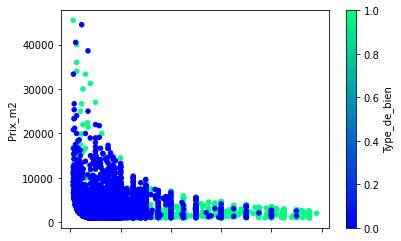

In [10]:
surf_prix_m2=df_location.plot.scatter(x='Surface_m2',y='Prix_m2',c='Type_de_bien',colormap='winter')

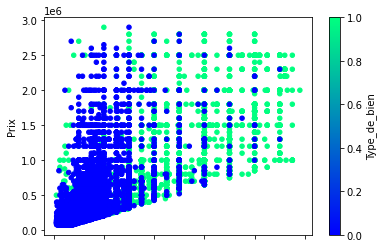

In [11]:
surf_prix=df_location.plot.scatter(x='Surface_m2',y='Prix',c='Type_de_bien',colormap='winter')

In [12]:
df_location.corr()[['Prix','Prix_m2']]

,Prix,Prix_m2
Prix,1.000000,0.374018
Type_de_bien,0.450648,-0.151910
Nb_pieces,0.618217,0.017419
Surface_m2,0.738465,-0.144827
Meuble,0.022541,0.153022
Condition,-0.067853,0.002968
Piscine,0.538499,0.227223
Prix_m2,0.374018,1.000000


Pour les locations, cela va être beaucoup plus compliqué de réaliser de bons modèles sur les prix au mètre carré, dû à la non-corrélation et à l'absence totale de linéarité des relations entre les prix au mètre carré et les autres variables.

### Données des ventes

Mêmes étapes qu'avec les biens en location. On pourrait, en plus, rajouter des caractéristiques qui sembleraient déterminantes dans le prix d'un bien, telles que la possession ou non d'un titre foncier. 

In [13]:
donnees_brutes_maisons_ventes=pd.read_csv(r'C:\Users\jeanc\Documents\fac\M2\python_1\Projet_immobilier_BF\A_travailler\PROJET_ML\jumia_ventes_maison.csv')
donnees_brutes_appart_ventes=pd.read_csv(r'C:\Users\jeanc\Documents\fac\M2\python_1\Projet_immobilier_BF\A_travailler\PROJET_ML\jumia_ventes_appart.csv')

In [14]:
dataframes2=[donnees_brutes_maisons_ventes,donnees_brutes_appart_ventes]
df_ventes_brutes= pd.concat(dataframes2)
df_ventes_brutes.reset_index(drop=True, inplace=True)

In [15]:
df_ventes = ( #pipe nettoyage des données brutes ventes
    df_ventes_brutes
    .pipe(tbd.suppression_annonces_redondantes)
    .pipe(tbd.transfo_data)
    .pipe(tbd.ajout_colonnes)
    .pipe(tbd.ajout_colonnes_ventes)
    .pipe(tbd.numerise_les_colonnes)
    .pipe(tbd.numerise_les_colonnes_ventes)
    .pipe(tbd.transfo_ML)
    .pipe(tbd.conversion_types)
    .pipe(tbd.selection_m2)
    .pipe(tbd.numerise_la_colonne_type_de_bien)
)

In [16]:
df_ventes.head(10)

,Prix,Adresse,Type_de_bien,Nb_pieces,Surface_m2,Meuble,Condition,Piscine,Titre_foncier,Prix_m2
0,45000000.0,Riviera,1,4,200,0,0,0,0,225000.000000
2,115000000.0,Angré,1,9,340,0,0,0,0,338235.294118
6,100000000.0,2 Plateaux,1,4,300,0,0,0,0,333333.333333
11,170000000.0,Yopougon,1,9,450,0,0,0,0,377777.777778
12,90000000.0,Angré,1,6,300,0,1,0,0,300000.000000
16,500000000.0,Cocody,1,6,500,0,0,0,0,1000000.000000
17,42000000.0,Riviera,1,4,200,0,0,0,0,210000.000000
18,190000000.0,Cocody,1,13,480,0,0,0,0,395833.333333
19,45000000.0,Riviera,1,4,200,0,0,0,0,225000.000000
20,47000000.0,Angré,1,5,240,0,0,0,0,195833.333333


In [17]:
df_ventes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23688 entries, 0 to 53548
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Prix           23688 non-null  Float64
 1   Adresse        23688 non-null  string 
 2   Type_de_bien   23688 non-null  int64  
 3   Nb_pieces      23688 non-null  Int64  
 4   Surface_m2     23688 non-null  Int64  
 5   Meuble         23688 non-null  Int64  
 6   Condition      23688 non-null  Int64  
 7   Piscine        23688 non-null  Int64  
 8   Titre_foncier  23688 non-null  Int64  
 9   Prix_m2        23688 non-null  Float64
dtypes: Float64(2), Int64(6), int64(1), string(1)
memory usage: 2.2 MB


In [18]:
round(df_ventes.describe(),2)

,Prix,Type_de_bien,Nb_pieces,Surface_m2,Meuble,Condition,Piscine,Titre_foncier,Prix_m2
count,2.368800e+04,23688.0,23688.00,23688.00,23688.00,23688.00,23688.00,23688.00,2.368800e+04
mean,2.102266e+08,0.9,5.62,370.30,0.06,0.16,0.11,0.05,5.158976e+05
std,4.365664e+09,0.3,2.70,176.06,0.23,0.37,0.31,0.23,8.752369e+06
min,1.200000e+05,0.0,1.00,12.00,0.00,0.00,0.00,0.00,1.500000e+03
25%,5.000000e+07,1.0,4.00,250.00,0.00,0.00,0.00,0.00,2.000000e+05
50%,8.600000e+07,1.0,5.00,321.00,0.00,0.00,0.00,0.00,2.857143e+05
75%,1.800000e+08,1.0,6.00,500.00,0.00,0.00,0.00,0.00,4.666667e+05
max,5.500000e+11,1.0,20.00,996.00,1.00,1.00,1.00,1.00,1.047619e+09


Une fois de plus les maximum et minimum des prix au mètre carré semblent faux. Nous sommes donc allés chercher les informations sur plusieurs sites d'immobilier du pays ayant analysé les prix au mètre carré des biens à la vente pour des biens à Abidjan et en dehors d'Abidjan. Les prix minimum ne descendent pas en dessous des 300 000 FCFA et les prix maximum ne montent pas au dessus des 1 500 000 FCFA.

In [19]:
df_ventes=df_ventes[df_ventes.Prix_m2<1500000]
df_ventes=df_ventes[df_ventes.Prix_m2>300000]

In [20]:
round(df_ventes.describe(),2)

,Prix,Type_de_bien,Nb_pieces,Surface_m2,Meuble,Condition,Piscine,Titre_foncier,Prix_m2
count,1.058400e+04,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00,10584.00
mean,2.344948e+08,0.87,6.38,410.78,0.08,0.18,0.21,0.04,555982.53
std,1.639615e+08,0.33,2.75,192.31,0.27,0.38,0.40,0.21,233939.93
min,5.000000e+06,0.00,1.00,12.00,0.00,0.00,0.00,0.00,301038.06
25%,1.200000e+08,1.00,5.00,300.00,0.00,0.00,0.00,0.00,375000.00
50%,1.800000e+08,1.00,6.00,400.00,0.00,0.00,0.00,0.00,489199.69
75%,3.000000e+08,1.00,7.00,500.00,0.00,0.00,0.00,0.00,666666.67
max,1.200000e+09,1.00,20.00,996.00,1.00,1.00,1.00,1.00,1498422.71


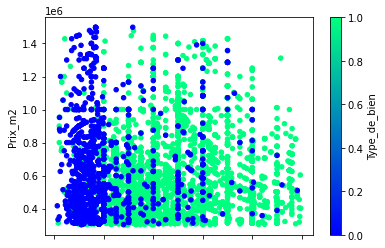

In [21]:
surf_prixm22=df_ventes.plot.scatter(x='Surface_m2',y='Prix_m2',c='Type_de_bien',colormap='winter')

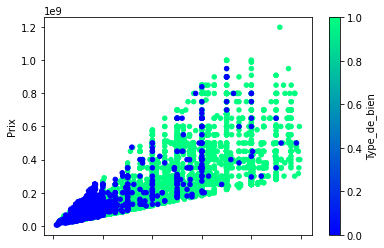

In [22]:
surf_prix2=df_ventes.plot.scatter(x='Surface_m2',y='Prix',c='Type_de_bien',colormap='winter')

In [23]:
df_ventes.corr()[['Prix','Prix_m2']]

,Prix,Prix_m2
Prix,1.000000,0.681678
Type_de_bien,0.243256,-0.117739
Nb_pieces,0.409270,0.197084
Surface_m2,0.761917,0.135810
Meuble,0.132032,0.193834
Condition,-0.052473,0.013981
Piscine,0.415493,0.277597
Titre_foncier,-0.050514,-0.049501
Prix_m2,0.681678,1.000000


Il semble évident que, pour les ventes et les locations, nous aurons de meilleurs résultats sur des modèles prédisant le prix du bien afin d'ensuite transformer le résultat pour avoir un prix au mètre carré. Le but, rappelons le, est d'identifier les meilleurs investissements locatifs, c'est à dire, les biens à l'achat qui auront les meilleurs rendements annuels. 

Si un modèle prédisant le prix au mètre carré d'un bien était intéressant, c'est qu'il permettait d'allier la valeur d'un bien et sa taille. Malheureusement, il semble très compliqué (probablement à cause de la qualité des données) de construire un bon modèle. Essayons tout de même sur les locations.

## Phase de prédiction

Ici nous allons construire les modèles pour les deux bases de données, ces modèles seront ensuite vérifiés et sélectionnés par cross-validation.

Commençons par les locations.

### Locations test 1 : Prédicteur de prix au m2


In [28]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import modeles as md
import numpy as np
import warnings

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score

**Préparation des variables, sélection des modèles et découpage des échantillons**

In [30]:
colonne_X_a_numeriser=['Adresse']
colonnes_X_deja_numeriques_location=["Type_de_bien", "Condition","Piscine","Meuble", "Surface_m2", "Nb_pieces"]

In [32]:
X_loc_m2=md.variables_X(df_location,colonne_X_a_numeriser,colonnes_X_deja_numeriques_location)
y_loc_m2=df_location.Prix_m2.values
print(y_loc_m2.shape)

(23082, 24)
(23082,)


In [33]:
X_tr_loc_m2, X_te_loc_m2, y_tr_loc_m2, y_te_loc_m2 = train_test_split(X_loc_m2, y_loc_m2, test_size=0.4, random_state=42) #découpage des échantillons, 0.4 test 0.6 train, une taille plus optimale 
# pour le découpage aurait été 0.33 0.66 voire 0.25 0.75 mais par nécessité le découpage a été ramené à 0.4 0.6

In [34]:
val_alpha=(1e-3, 1e-2, 1e-1) # paramètres pour les régressions
val_l1=(0.25, 0.5, 0.75) # paramètres pour les régressions
nb_voisins=range(5,10)
nb_estimators=( 100, 150, 200) # paramètres pour les forêts aléatoires

In [35]:
modeles=md.modeles_regression(val_alpha,val_alpha,val_alpha,val_l1,nb_voisins,nb_estimators)

In [38]:
resultats_train=md.modeles_sur_train(modeles,X_tr_loc_m2,y_tr_loc_m2,5,False)

RandomForestRegressor(n_estimators=150)       0.508 0.527 0.044183
RandomForestRegressor(n_estimators=200)       0.507 0.531 0.045677
RandomForestRegressor()                       0.506 0.526 0.045145
KNeighborsRegressor(n_neighbors=9)            0.408 0.403 0.023747
KNeighborsRegressor(n_neighbors=8)            0.406 0.401 0.023139
KNeighborsRegressor(n_neighbors=7)            0.403 0.412 0.023314
KNeighborsRegressor(n_neighbors=6)            0.39 0.392 0.02227
KNeighborsRegressor()                         0.384 0.374 0.021762
SVR(C=1000)                                   0.283 0.282 0.022587
SVR(C=1000, epsilon=0.01)                     0.283 0.282 0.02259
SVR(C=1000, epsilon=0.001)                    0.283 0.282 0.02259
SVR(C=1000, epsilon=1)                        0.283 0.282 0.022519
Lasso(alpha=0.1)                              0.248 0.252 0.0082591
Ridge(alpha=0.1)                              0.248 0.252 0.0082712
Lasso(alpha=0.01)                             0.248 0.252 0.0082

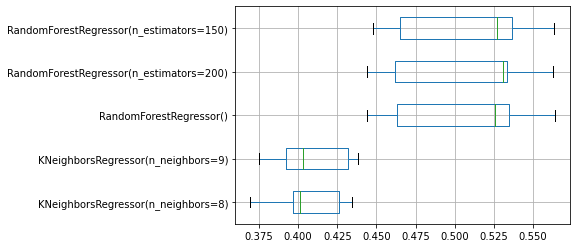

In [39]:
md.visualisation_des_scores(resultats_train,5)

Les résultats des modèles sur les échantillons d'entrainements ne sont pas très bons mais, étonnemment, pas mauvais non plus. Les meilleurs modèles sont très clairement les forêts aléatoires et les KNRegressors. Testons les mêmes modèles sur les prix.

### Locations test 2 : Prédicteur de prix

In [36]:
X_loc=md.variables_X(df_location,colonne_X_a_numeriser,colonnes_X_deja_numeriques_location)
y_loc=df_location.Prix.values
print(y_loc.shape)

(23082, 24)
(23082,)


In [37]:
X_tr_loc, X_te_loc, y_tr_loc, y_te_loc = train_test_split(X_loc, y_loc, test_size=0.4, random_state=42)

In [32]:
resultats_train=md.modeles_sur_train(modeles,X_tr_loc,y_tr_loc,5,False)

RandomForestRegressor(n_estimators=200, n_jobs=4) 0.706  0.7 0.011785
RandomForestRegressor(n_estimators=150, n_jobs=4) 0.706 0.699 0.012197
RandomForestRegressor(n_jobs=4)               0.706 0.699 0.011493
KNeighborsRegressor(n_neighbors=9)            0.693 0.69 0.012886
KNeighborsRegressor(n_neighbors=8)            0.689 0.683 0.014742
ElasticNet(alpha=0.001, l1_ratio=0.75)        0.688 0.683 0.010034
ElasticNet(alpha=0.001)                       0.688 0.684 0.0099134
Ridge(alpha=0.1)                              0.688 0.683 0.010337
Ridge(alpha=0.01)                             0.688 0.683 0.010358
Lasso(alpha=0.1)                              0.688 0.683 0.010359
Ridge(alpha=0.001)                            0.688 0.683 0.01036
Lasso(alpha=0.01)                             0.688 0.683 0.01036
Lasso(alpha=0.001)                            0.688 0.683 0.01036
ElasticNet(alpha=0.001, l1_ratio=0.25)        0.688 0.684 0.0098462
KNeighborsRegressor(n_neighbors=7)            0.686 0.682

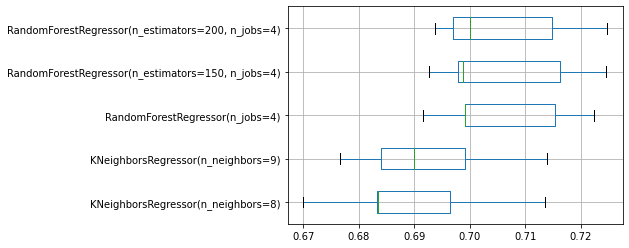

In [33]:
md.visualisation_des_scores(resultats_train,5)

Notre intuition est confirmée, les modèles prédicteurs du prix sont bien plus performants que ceux du prix au mètre carré (0.706 contre 0.508 pour les deux meilleurs modèles respectifs). 

Les forêts aléatoires performent les mieux, les scores ne varient que très peu avec le nombre d'estimateurs, ce qui semble indiquer que la performance du modèle est stable et converge vers un certain niveau de précision, néanmoins nous allons tenter d'augmenter le nombre de paramètres afin de vérifier cette hypothèse.

Notons qu'un score de 0.705 n'est pas trop mal considérant que notre marché ne semble pas totalement rationnel, au contraire notre modèle permettrait plutôt de rationaliser les prix. 

**Score de notre meilleur modèle sur les données tests**

Après avoir testé plusieurs hyperparamètres, nous avons déterminé qu'un nombre d'estimateurs autour de 300 était optimal (même si les scores ne variaient que très peu (0.001)), d'ailleurs les scores ne variant que très peu lors de la cross-validation indiquent que les modèles ne font pas de sur ou sous apprentissage. 

In [38]:
meilleur_modele=RandomForestRegressor(n_estimators=300,n_jobs=4)
md.score_meilleur_modele_sur_donnees_test(meilleur_modele,X_tr_loc,y_tr_loc,X_te_loc,y_te_loc)
md.sauvergarder_le_modele("Modele_location_RandomForest",meilleur_modele)

Score test : 0.707
Moyenne score train : 0.706


Les résultats sont très proches du score sur les données train. Confirmant encore une fois que le modèle ne fait pas de sur-apprentissage, ni de sous-apprentissage.

### Les ventes

Pour les ventes nous testerons les modèles pour prédire les prix au vu de nos résultats précédents.

In [39]:
colonne_X_a_numeriser=['Adresse']
colonnes_X_deja_numeriques_ventes=["Type_de_bien", "Condition","Piscine","Meuble","Titre_foncier", "Surface_m2", "Nb_pieces"]
X_ventes=md.variables_X(df_ventes,colonne_X_a_numeriser,colonnes_X_deja_numeriques_ventes)
y_ventes=df_ventes.Prix.values
print(y_ventes.shape)

(10584, 25)
(10584,)


In [40]:
X_tr_ventes, X_te_ventes, y_tr_ventes, y_te_ventes = train_test_split(X_ventes, y_ventes, test_size=0.3, random_state=42)# le découpage est meilleur ici car il y a moins de données au total

In [35]:
resultats_train_ventes=md.modeles_sur_train(modeles,X_tr_ventes,y_tr_ventes,5,False)

RandomForestRegressor(n_estimators=200, n_jobs=4) 0.73 0.73 0.011074
RandomForestRegressor(n_estimators=150, n_jobs=4) 0.729 0.729 0.010883
RandomForestRegressor(n_jobs=4)               0.728 0.727 0.010707
KNeighborsRegressor(n_neighbors=9)            0.665 0.664 0.018039
KNeighborsRegressor(n_neighbors=7)            0.664 0.668 0.01724
KNeighborsRegressor(n_neighbors=8)            0.663 0.666 0.018734
KNeighborsRegressor(n_neighbors=6)            0.661 0.664 0.018167
KNeighborsRegressor()                         0.658 0.664 0.017819
ElasticNet(alpha=0.001, l1_ratio=0.75)        0.652 0.649 0.0095061
Ridge(alpha=0.1)                              0.652 0.648 0.0095704
Ridge(alpha=0.01)                             0.652 0.648 0.0095737
Ridge(alpha=0.001)                            0.652 0.648 0.009574
Lasso(alpha=0.1)                              0.652 0.648 0.0095774
Lasso(alpha=0.01)                             0.652 0.648 0.0095775
Lasso(alpha=0.001)                            0.652 

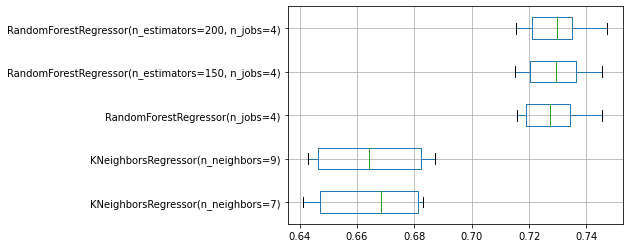

In [37]:
md.visualisation_des_scores(resultats_train_ventes,5)

Visiblement ce sont encore une fois les forêts aléatoires qui donnent les meilleurs résultats avec un score moyen de 0.73, encore une fois, un score de 0.73 ne semble pas ridicule considérant la possibilité que le marché ne soit pas totalement rationnel. Ce score semble encore une fois très stable avec très peu de variations entre les différents nombres d'estimateurs. Nous allons tout de même tenter de recalibrer les paramètres vu qu'il semblerait que plus on augmente le nombre d'estimateurs meilleur est le score.

Après recalibrage jusqu'à 500 estimateurs, il semblerait que le score reste très sensiblement le même avec encore une fois le meilleur score obtenu à 300 estimateurs. Comme le modèle pour les locations, celui-ci ne semble pas indiquer de sur ou sous apprentissage.

**Score de notre meilleur modèle sur les données tests**

In [41]:
meilleur_modele_ventes=RandomForestRegressor(n_estimators=300)
md.score_meilleur_modele_sur_donnees_test(meilleur_modele_ventes,X_tr_ventes,y_tr_ventes,X_te_ventes,y_te_ventes)
md.sauvergarder_le_modele("Modele_vente_RandomForest",meilleur_modele_ventes)

Score test : 0.746
Moyenne score train : 0.73


Le modèle donne de très bons résultats sur les données test (même meilleurs que sur les données train).

# Utilisation des modèles

Nous obtenons finalement deux modèles qui prédisent avec précision les prix en fonction des caractéristiques d'un bien (des scores$^*$ respectifs de 0.706 et 0.73). Nous devrions maintenant utiliser ces modèles sur de nouvelles données et récupérer les prix estimés. Maintenant, nous sommes en capacité de créer plusieurs mesures de la rentabilité d'un investissement immobilier locatif. Reste à savoir laquelle est la meilleure.

Nous allons nous extraire un nouvel échantillon de la base de données ventes.

$^*$ Précisons que le score est calculé ici de cette façon : $R^2=1-\frac{u}{v}$ avec $u=\sum^n_{i=0}(y_{true} - y_{pred})^2$ et $v=\sum^n_{i=0}(y_{true} - \overline{y_{true}})^2$.

In [53]:
echantillon=df_ventes.sample(n=2000) # extraction d'un échantillon aléatoire
echantillon=echantillon.drop(['Prix','Prix_m2'],axis=1)
X_ventes=md.variables_X(echantillon,colonne_X_a_numeriser,colonnes_X_deja_numeriques_ventes)
X_location=md.variables_X(echantillon,colonne_X_a_numeriser,colonnes_X_deja_numeriques_location)

(2000, 25)
(2000, 24)


In [54]:
modele_ventes=md.ouvrir_le_modele('Modele_vente_RandomForest')
modele_location=md.ouvrir_le_modele('Modele_location_RandomForest')

In [55]:
prix_ventes_predits=modele_ventes.predict(X_ventes)
prix_location_predits=modele_location.predict(X_location)

## Première utilisation

Une utilisation logique du modèle de prédiction des prix à la location serait de tout simplement comparer la valeur des rentes prédites à l'année, au prix réel à la vente afin d'avoir une idée du rendement à l'année et de cibler les biens avec les meilleurs rendements prédits. Dans l'immobilier commercial, ces techniques sont d'ailleurs probablement déjà utilisées pour anticiper et proposer à leurs clients les meilleurs biens aux prix du marché actuel.

Cette utilisation est déjà très commune, nous aimerions donc proposer une seconde solution. 

## Seconde utilisation

Imaginons maintenant que nous ne possédons pas encore d'informations sur les prix de vente d'une liste de biens. Par exemple, une société immobilière qui aurait des informations internes sur des biens qui sont sur le point d'être mis en vente mais qui ne le sont pas encore. 

Il serait très intéressant pour cette société, soit pour investir elle-même, soit pour aller prospecter des clients qui cherchent à investir dans l'immobilier locatif, de pouvoir anticiper les rendements annuels de ces biens à la location en fonction des caractéristiques du marché avant même que ces biens ne soient mis en vente. Cet outil lui donnerait un temps d'avance sur ses concurrents, car il lui permettrait de cibler les meilleurs potentiels investissements avant même qu'ils n'arrivent sur le marché et ainsi de potentiellement obtenir des biens à un prix concurrentiel, voire en dessous des prix du marché. 

Regardons concrètement comment nous pourrions appliquer ces modèles.

## Mesure 1 : Prix

La mesure la plus simple serait de prendre le prix de location, de le multiplier par 12 et enfin de le diviser par le prix d'achat du bien. Le résultat obtenu serait le rendement annuel en pourcentage sur l'investissement initial (on ne prendra pas en compte l'inflation afin de simplifier).

In [56]:
echantillon['Prix_predits_ventes']=prix_ventes_predits
echantillon['Prix_predits_location']=prix_location_predits
echantillon['Prix_predits_location_annuel']=prix_location_predits*12

In [57]:
echantillon['Mesure_1']=np.round(((prix_location_predits*12)/prix_ventes_predits)*100,2)

In [58]:
echantillon=echantillon.sort_values(by=['Mesure_1'],ascending=False)
echantillon.head(15)

,Adresse,Type_de_bien,Nb_pieces,Surface_m2,Meuble,Condition,Piscine,Titre_foncier,Prix_predits_ventes,Prix_predits_location,Prix_predits_location_annuel,Mesure_1
52376,Le Plateau,0,4,82,0,0,0,0,3.164944e+07,1.448010e+06,1.737611e+07,54.90
48963,Bingerville,0,4,120,0,0,0,0,4.712081e+07,1.087254e+06,1.304705e+07,27.69
53082,Yopougon,0,1,12,0,0,0,0,6.086667e+06,9.129444e+04,1.095533e+06,18.00
51432,Riviera,0,5,120,0,1,1,0,1.274341e+08,1.834606e+06,2.201528e+07,17.28
38666,Riviera,1,6,300,0,0,1,0,1.481120e+08,2.098355e+06,2.518026e+07,17.00
3558,Bingerville,1,9,306,0,0,1,0,1.617531e+08,2.206666e+06,2.647999e+07,16.37
1184,Cocody,1,6,300,0,0,1,0,1.772063e+08,2.411656e+06,2.893987e+07,16.33
53429,Riviera,0,4,100,0,1,0,0,5.808497e+07,7.829907e+05,9.395888e+06,16.18
28662,Cocody,1,7,300,0,0,1,0,1.826721e+08,2.388500e+06,2.866200e+07,15.69
32221,Cocody,1,7,300,0,0,1,0,1.826721e+08,2.388500e+06,2.866200e+07,15.69


Si on sélectionne les quinzes meilleurs biens selon la mesure 1, on voit des rendements à l'année entre 15 et 30% (on ne commentera pas sur le premier qui semble légèrement enflé et peu plausible dans la réalité). Cette mesure pourrait en effet suffire pour déduire les meilleurs investissements locatifs, seulement si d'autres contraintes rentrent en jeu, telles que des contraintes sur la taille du bien, ou encore le budget (intrinsèquement lié à la surface) cette mesure pourrait se révéler inefficace.

## Mesure 2 : Prix au m$^2$

La seconde mesure ressemblera beaucoup à la première, mais une première étape transformera le prix prédit en prix au mètre carré (`Prix_m2`$=\frac{\text{Prix}}{\text{Surface}}$) pour les prix à la location. Le résultat obtenu serait le rendement annuel en pourcentage sur l'investissement initial au mètre carré. Alternativement, on pourrait aussi tout simplement récupérer la première mesure et la diviser par la surface, ce qui nous donnerait aussi le rendement par mètre carré en pourcentage.

In [62]:
echantillon['Mesure_2']=((echantillon['Prix_predits_location_annuel']/echantillon['Surface_m2'])/echantillon['Prix_predits_ventes'])*100
#echantillon['Mesure_2']=(echantillon['Mesure_1']/echantillon['Surface_m2'])*100  alternativement
echantillon['Mesure_2'] = echantillon['Mesure_2'].apply(lambda x: round(x, 3))

In [63]:
echantillon=echantillon.sort_values(by=['Mesure_2'],ascending=False)
echantillon.head(15)

,Adresse,Type_de_bien,Nb_pieces,Surface_m2,Meuble,Condition,Piscine,Titre_foncier,Prix_predits_ventes,Prix_predits_location,Prix_predits_location_annuel,Mesure_1,Mesure_2
53082,Yopougon,0,1,12,0,0,0,0,6.086667e+06,9.129444e+04,1.095533e+06,18.00,1.500
52376,Le Plateau,0,4,82,0,0,0,0,3.164944e+07,1.448010e+06,1.737611e+07,54.90,0.670
38860,Port Bouet,1,5,30,0,0,0,0,3.815667e+07,3.678333e+05,4.414000e+06,11.57,0.386
21370,Koumassi,1,3,30,0,0,0,0,2.639333e+07,2.387584e+05,2.865100e+06,10.86,0.362
48963,Bingerville,0,4,120,0,0,0,0,4.712081e+07,1.087254e+06,1.304705e+07,27.69,0.231
51364,Riviera,0,2,45,0,0,0,0,2.127333e+07,1.496587e+05,1.795905e+06,8.44,0.188
53429,Riviera,0,4,100,0,1,0,0,5.808497e+07,7.829907e+05,9.395888e+06,16.18,0.162
49751,Cocody,0,1,45,0,0,0,1,2.011333e+07,1.212420e+05,1.454903e+06,7.23,0.161
51432,Riviera,0,5,120,0,1,1,0,1.274341e+08,1.834606e+06,2.201528e+07,17.28,0.144
44389,Yopougon,1,7,110,0,0,0,0,3.975167e+07,4.733936e+05,5.680723e+06,14.29,0.130


Si on ordonne par meilleur rendement au mètre carré on se rend compte que cela bouleverse complétement le classement des meilleurs investissement précedemment établi avec la première mesure et ce ne sont pas les investissements les plus rentables (selon la première mesure) qui terminent en haut du tableau (ils restent tout de même bien classés). Mais excepté deux biens, tout les autres étaient mesurés par la première mesure avec un rendement total par an inférieur à 20%.

Assez logiquement, ce qui ressortent en haut du classement (par la mesure 2) sont des biens beaucoup plus petits avec un bien meilleur rendement au mètre carré.

Et si on pouvait créer une mesure qui prend en compte les deux précédentes ? 

## Mesure 3 : Prise en compte des prix et des prix au mètre carré

L'objectif ici serait de créer une mesure qui permettrait de prendre en compte le rendement total et le rendement au mètre carré. Une première étape serait de règler le problème d'échelle entre la mesure 1 et la mesure 2 en centrant et réduisant. Une fois les effets d'échelle supprimés, nous pourrions donc tout simplement réaliser la moyenne des deux mesures précédentes.

* $Mesure3=\frac{Mesure1+Mesure2}{2}$

Et si on voulait affecter plus d'importance à l'une ou l'autre mesure ?

* $Mesure3_{bis}=\frac{\alpha Mesure1+\beta Mesure2}{\alpha +\beta}$


In [64]:
moyenne_mesure_1=echantillon['Mesure_1'].mean()
moyenne_mesure_2=echantillon['Mesure_2'].mean()
sd_mesure_1=echantillon['Mesure_1'].std()
sd_mesure_2=echantillon['Mesure_2'].std()

In [65]:
echantillon['Mesure_3']=((echantillon['Mesure_1']-moyenne_mesure_1)/sd_mesure_1+(echantillon['Mesure_2']-moyenne_mesure_2)/sd_mesure_2)/2
echantillon['Mesure_3'] = echantillon['Mesure_3'].apply(lambda x: round(x, 2))
echantillon=echantillon.sort_values(by=['Mesure_3'],ascending=False)
echantillon.head(15)

,Adresse,Type_de_bien,Nb_pieces,Surface_m2,Meuble,Condition,Piscine,Titre_foncier,Prix_predits_ventes,Prix_predits_location,Prix_predits_location_annuel,Mesure_1,Mesure_2,Mesure_3
53082,Yopougon,0,1,12,0,0,0,0,6.086667e+06,9.129444e+04,1.095533e+06,18.00,1.500,19.75
52376,Le Plateau,0,4,82,0,0,0,0,3.164944e+07,1.448010e+06,1.737611e+07,54.90,0.670,17.61
48963,Bingerville,0,4,120,0,0,0,0,4.712081e+07,1.087254e+06,1.304705e+07,27.69,0.231,6.97
38860,Port Bouet,1,5,30,0,0,0,0,3.815667e+07,3.678333e+05,4.414000e+06,11.57,0.386,5.49
21370,Koumassi,1,3,30,0,0,0,0,2.639333e+07,2.387584e+05,2.865100e+06,10.86,0.362,5.07
51432,Riviera,0,5,120,0,1,1,0,1.274341e+08,1.834606e+06,2.201528e+07,17.28,0.144,3.84
53429,Riviera,0,4,100,0,1,0,0,5.808497e+07,7.829907e+05,9.395888e+06,16.18,0.162,3.82
44389,Yopougon,1,7,110,0,0,0,0,3.975167e+07,4.733936e+05,5.680723e+06,14.29,0.130,3.07
38666,Riviera,1,6,300,0,0,1,0,1.481120e+08,2.098355e+06,2.518026e+07,17.00,0.057,2.77
50388,2 Plateaux,0,3,120,0,1,1,0,7.644877e+07,8.654667e+05,1.038560e+07,13.59,0.113,2.73


In [66]:
alpha=2
beta=1
echantillon['Mesure_3_bis']=(((echantillon['Mesure_1']-moyenne_mesure_1)/sd_mesure_1)*alpha+((echantillon['Mesure_2']-moyenne_mesure_2)/sd_mesure_2))*beta/(alpha+beta)
echantillon['Mesure_3_bis'] = echantillon['Mesure_3_bis'].apply(lambda x: round(x, 2))
echantillon=echantillon.sort_values(by=['Mesure_3_bis'],ascending=False)
echantillon.head(15)

,Adresse,Type_de_bien,Nb_pieces,Surface_m2,Meuble,Condition,Piscine,Titre_foncier,Prix_predits_ventes,Prix_predits_location,Prix_predits_location_annuel,Mesure_1,Mesure_2,Mesure_3,Mesure_3_bis
52376,Le Plateau,0,4,82,0,0,0,0,3.164944e+07,1.448010e+06,1.737611e+07,54.90,0.670,17.61,18.45
53082,Yopougon,0,1,12,0,0,0,0,6.086667e+06,9.129444e+04,1.095533e+06,18.00,1.500,19.75,14.87
48963,Bingerville,0,4,120,0,0,0,0,4.712081e+07,1.087254e+06,1.304705e+07,27.69,0.231,6.97,7.66
38860,Port Bouet,1,5,30,0,0,0,0,3.815667e+07,3.678333e+05,4.414000e+06,11.57,0.386,5.49,4.49
51432,Riviera,0,5,120,0,1,1,0,1.274341e+08,1.834606e+06,2.201528e+07,17.28,0.144,3.84,4.16
21370,Koumassi,1,3,30,0,0,0,0,2.639333e+07,2.387584e+05,2.865100e+06,10.86,0.362,5.07,4.11
53429,Riviera,0,4,100,0,1,0,0,5.808497e+07,7.829907e+05,9.395888e+06,16.18,0.162,3.82,4.01
38666,Riviera,1,6,300,0,0,1,0,1.481120e+08,2.098355e+06,2.518026e+07,17.00,0.057,2.77,3.41
44389,Yopougon,1,7,110,0,0,0,0,3.975167e+07,4.733936e+05,5.680723e+06,14.29,0.130,3.07,3.24
3558,Bingerville,1,9,306,0,0,1,0,1.617531e+08,2.206666e+06,2.647999e+07,16.37,0.053,2.60,3.21


On obtient encore une fois un classement très différent avec des un mix des biens les mieux classés avec la première mesure et ceux de la seconde mesure plus de nouveaux biens qui n'apparaissaient dans aucunes des deux précédentes mesures.


## En conclusion

Nous pourrions finalement imaginer réaliser des listes d'investissements par intervalles de budget, par type de bien, par adresse... Les possibilités d'analyses avec ce genre de données sont infinies et nous pourrions réellement imaginer une société d'investissements immobiliers utiliser ce genre de de modèle et ce genre de mesures pour guider leurs décisions d'investissements et d'être les plus performants sur leurs marchés.